In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
import nltk
from wordcloud import WordCloud 

In [17]:
mpl.rcParams["patch.force_edgecolor"]=True
mpl.rcParams["patch.edgecolor"]="Green"
mpl.rcParams["patch.linewidth"]=3

In [18]:
data = pd.read_csv('products - Sheet1.csv')

In [19]:
data.head()

,ProductId,Title,Image URL,Division,Category,Sub category,Article type,Offer price,Sale price,Color,Gender
0,E8AC41D107EA5DBB5DF561A684899B38,Color Dose Pearls Bronze 59 Nail Polish,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Makeup,Nails,Nail Polish,Nail Polish,59,59,Color Dose,women
1,04AE770377AABCCBCCDD5FBC93CC83E1,Rimmel Space Dust Nail Polish - Luna Love #004,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Makeup,Nails,Nail Polish,Nail Polish,310,310,Rimmel,women
2,21B0CF144B3CFFDDCCE4937C7731A7CE,Color Dose Pearls Copper Rust 58 Nail Polish,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Makeup,Nails,Nail Polish,Nail Polish,59,59,Color Dose,women
3,129CE0C7596D2D346E5CDC54E55A3A67,Color Dose Matt Nude 25 Nail Polish,"https://media6.ppl-media.com/tr:h-235,w-235,c-...",NaN,Nails,Nail Polish,Nail Polish,59,59,color dose,women
4,A5E51E0F6C9929ECD16D875EC9A4AFA5,SUGAR Tip Tac Toe Nail Lacquer - 032 Mary Popp...,"https://media6.ppl-media.com/tr:h-750,w-750,c-...",Makeup,Nails,Nail Polish,Nail Polish,237,249,Sugar,women


In [20]:
data.isnull().sum()

ProductId          0
Title              0
Image URL          0
Division        2394
Category           0
Sub category       0
Article type       0
Offer price        0
Sale price         0
Color            108
Gender             0
dtype: int64

In [21]:
data.shape

(7226, 11)

In [22]:
sea=data.groupby(['Category','Gender']).size()
sea=pd.DataFrame(sea)
sea=sea.reset_index()
sea=sea.rename(columns={0:'Count'})
sea=sea.sort_values(by='Count',ascending=False)
sea.head(10)

,Category,Gender,Count
34,Skin Care,women,560
12,Face Makeup,women,556
23,Jewellery,women,500
10,Eye Makeup,women,497
14,Family Nutrition,women,344
18,Hair Care and Styling,women,323
21,Hand And Nail Care,women,315
1,Body,women,301
24,Lip Makeup,women,300
39,Wellness,women,283


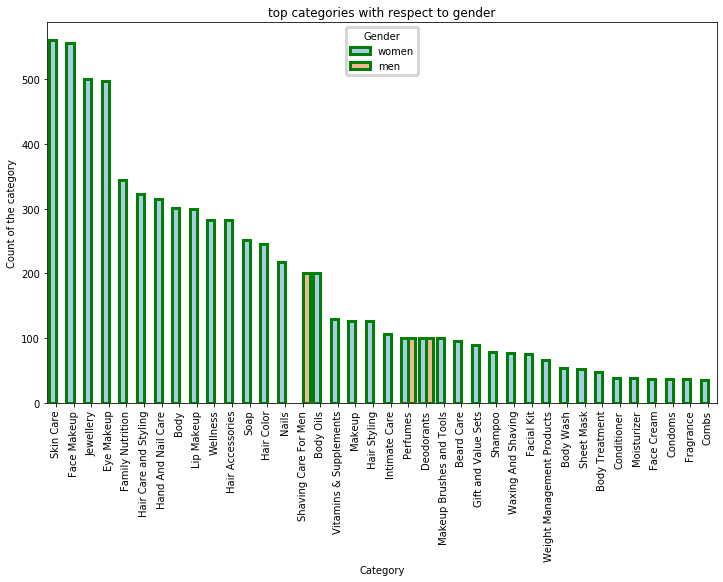

In [23]:
fig=plt.figure(figsize=(12,7))
grid= sns.barplot(y='Count',x='Category',hue='Gender',data=sea,palette='pastel')
plt.ylabel('Count of the category')
plt.title("top categories with respect to gender")
plt.xlabel("Category")
plt.xticks(rotation='vertical')
plt.show()

Here in this graph Skin Care is the product mostly used, therefore we must recommend this product to all the customers for high sales. 

In [24]:
data1=data[['Category','Sale price','Gender']].sort_values(by='Sale price',ascending=False)
data1=data1.groupby(['Category'])
data1=data1.head(5)

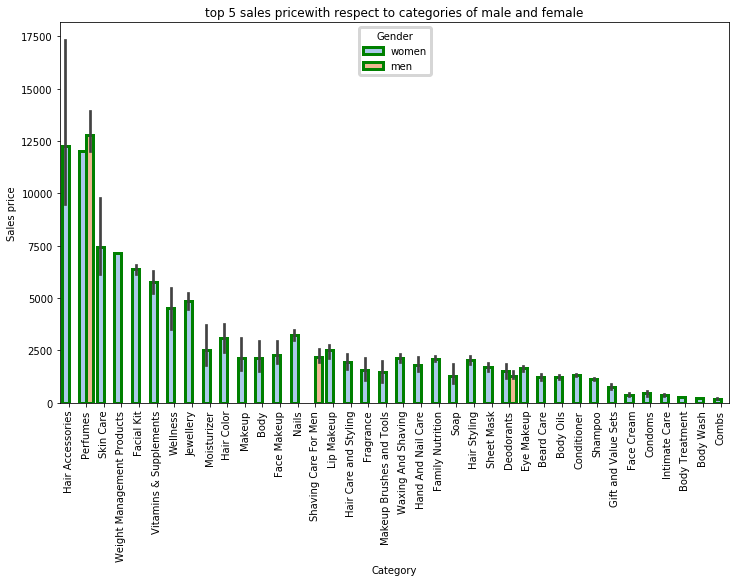

In [25]:
fig=plt.figure(figsize=(12,7))
grid= sns.barplot(y='Sale price',x='Category',hue='Gender',data=data1,palette='pastel')
plt.ylabel('Sales price')
plt.title("top 5 sales pricewith respect to categories of male and female")
plt.xlabel("Category")
plt.xticks(rotation='vertical')
plt.show()

# Here we are having the top 5 sales of categories.

#### Where we have hair accessories as the highest sales for women. There is perfumes for male as the highest sales price and second highest for the women. Therefore we must make the offer of the perfumes less for more sales.

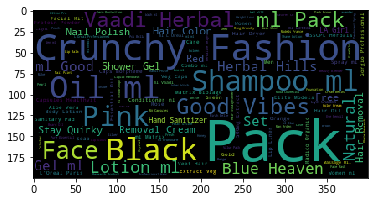

In [26]:
input_str=' '.join(data['Title'])
wc=WordCloud(background_color='black').generate(input_str)
plt.imshow(wc)

#### In this word cloud we can see that the most commonly used words is Fashion, Shampoo, Black, Gel, Oil..

In [27]:
prod = data[['Division', 'Category','Sub category', 'Article type', 'Offer price', 'Sale price', 'Color',
       'Gender']]

In [28]:
d1 = pd.get_dummies(prod)


In [29]:
docs = data['Title'].str.lower().str.replace('[^a-z ]',' ')

In [30]:
docs = data['Title'].str.lower().str.replace('[^a-z ]',' ')

In [31]:
stopwords = nltk.corpus.stopwords.words('english')

In [32]:
def clean_sentence(text):
    words = text.split(' ')
    words_clean = [word for word in words if word not in stopwords]
    return ' '.join(words_clean)
docs_clean = docs.apply(clean_sentence)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
vectorize = CountVectorizer()
vectorize.fit(docs_clean)
dtm = vectorize.transform(docs_clean)

In [34]:
d2 = pd.DataFrame(dtm.toarray())

In [35]:
d3 = pd.concat([d1,d2] , axis= 1)

In [36]:
d3['ProductId'] = data['ProductId']

In [37]:

train_x = d3.drop('ProductId', axis =1)

train_y = data['ProductId']

In [38]:
from scipy.spatial.distance import euclidean

In [39]:
test_sample = train_x.iloc[1]
df_eds = pd.DataFrame(columns =['index','euclidean'])
for index, row in train_x.iterrows():
    curr_ed = euclidean(test_sample.values , row.values)
    df_eds = df_eds.append({'index': index,
                           'euclidean':curr_ed} ,ignore_index = True)
neighbors = df_eds.sort_values('euclidean').head(10)['index']

In [40]:
train_y.loc[neighbors]

1.0       04AE770377AABCCBCCDD5FBC93CC83E1
56.0      D8185E26A8AAB25C99AE3132CC1C5A99
2256.0    4C2951FB9B90D8F6F56E1AB73A431764
4404.0                    17CBDDD6D7F54B3B
1313.0    3277F626618CD47937F4A643724DC701
405.0     BA515826AFF25E54F89D307816AC851F
5643.0    D4266BFE538BBF38716A96AB8F51B382
433.0     56DAC6DAA891E078395484384D12CF23
6547.0    ABAEF92AE259ED70EC232292D13D9D3F
871.0                     634952B95708B551
Name: ProductId, dtype: object